<a href="https://colab.research.google.com/github/macegosso/py-clustering/blob/main/clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

gerar dados aleatórios

In [4]:
n_samples = 300
x,y = make_blobs(n_samples=n_samples, centers=7, cluster_std=0.70, random_state=0)

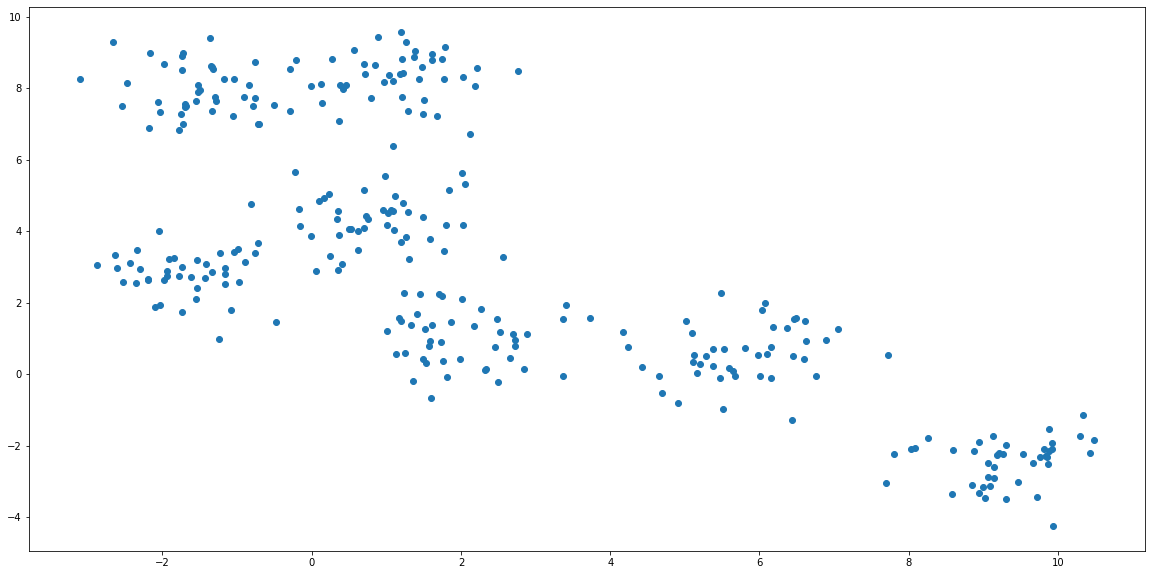

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(x[:,0], x[:,1])

In [6]:
kmeans = KMeans(3, init="k-means++", n_init=10, max_iter=n_samples, random_state=0)

In [7]:
pred = kmeans.fit_predict(x)

<function matplotlib.pyplot.show(*args, **kw)>

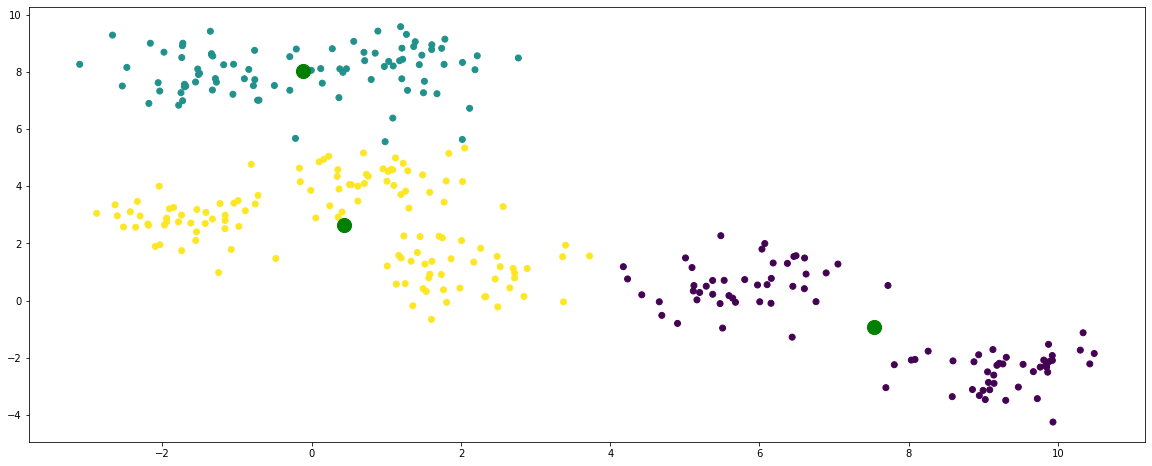

In [8]:
plt.figure(figsize=(20,8))
plt.scatter(x[:,0], x[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='green', s=200)
plt.show

In [13]:
wcss=[]
for i in range(2,10):
  kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=n_samples, random_state=0)
  pred = kmeans.fit(x)
  wcss.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

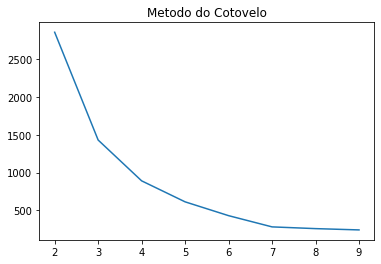

In [14]:
plt.plot(range(2, 10), wcss)
plt.title('Metodo do Cotovelo')
plt.show

In [30]:
import math
def numero_orimo_cluster(wcss, cluster_final):
  x0, y0 = 2, wcss[0]
  x1, y1 = cluster_final, wcss[len(wcss)-1]

  distancia = []
  for i in range(len(wcss)-1):
    x = i+2
    y = wcss[i]

    num = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
    den = math.sqrt((y1-y0)**2 + (x1 - x0)**2)

    distancia.append(num/den)
  print(distancia)
  return distancia.index(max(distancia))+2


print(f'Numero otimo: {numero_orimo_cluster(wcss, 10)}')

[9.5580905962539e-16, 3.3624178417492963, 4.014011154824954, 3.864045407360515, 3.423032424689089, 2.8774364836084736, 1.9475780811458479]
Numero otimo: 4
